In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Loading Dataset

In [3]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
np.unique(zoo['type'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [15]:
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]

In [61]:
# Splitting data into training and testing data set

In [18]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

<IPython.core.display.Javascript object>

((70, 16), (70,), (31, 16), (31,))

<b> Finding the optimal K value for KNN model by gridsearch method </b>

In [24]:
n_neighbors = np.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [89]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Best score and its parameter

In [90]:
print(grid.best_score_)
print(grid.best_params_)

0.9714285714285715
{'n_neighbors': 1}


In [ ]:
# As the best k value id given as 1 from gridsearch method, we are taking k=2 for avoiding overfit problem

In [85]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [86]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    15
6     6
2     3
7     2
5     2
4     2
3     1
dtype: int64

In [87]:
pd.crosstab(y_test,preds)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,15,0,0,0,0,0,0
2,0,3,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,2,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,1,2


In [ ]:
# We got accuracy of 96% for our model 

In [88]:
np.mean(preds==y_test)

0.967741935483871

<b> Ploting graph of accuracy with the k values we use</b>

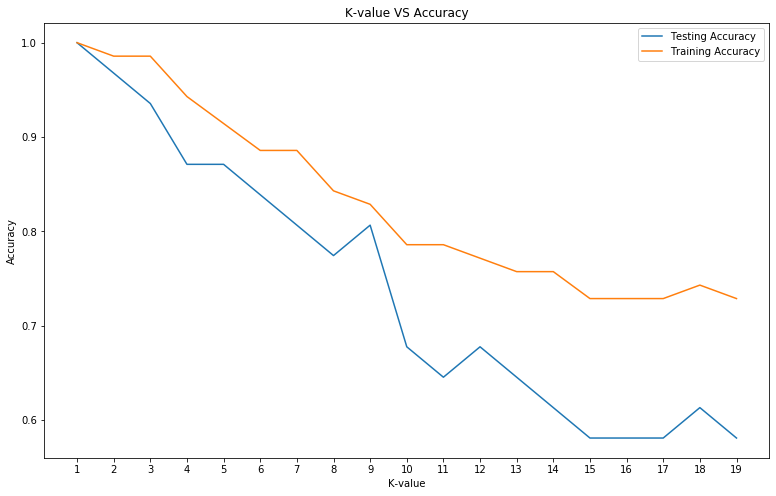

Best accuracy is 1.0 with K = 1


In [92]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

From above plot we can see the accuracy for train and test data we get when we use respective k values

For our data K=1 has best accuracy